### 1.1.1 Load libraries and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.cluster import hierarchy
import scipy.spatial.distance as sc
# from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px

In [3]:
# import library to normalize data
from sklearn.preprocessing import Normalizer

In [4]:
data=pd.read_csv('winequality-red.csv')
res=data.describe()
res

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 1.1.2. Dmensionality reduction

In [5]:
# reduce dimensioanlity to get a better visualization

In [6]:
# load libraries for pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
X = data.drop('quality', axis=1)

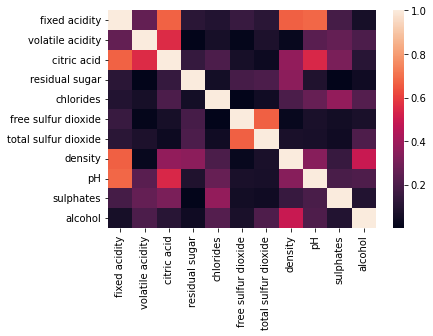

In [8]:
# get a heatmap of the correlation matrix
corr = X.corr().abs()
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns);

In [9]:
# from the heatmap we can see that there are few variables that are highly correlated
# Still we will use PCA to reduce the dimensionality

In [10]:
# standardize the data
X = pd.DataFrame(
    StandardScaler().fit_transform(data),
    columns=data.columns
).drop('quality', axis=1)

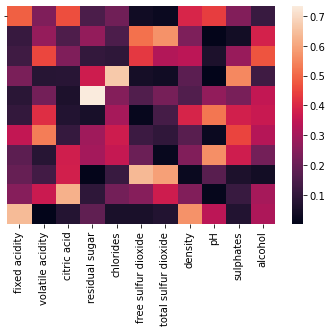

In [11]:
# get the weights of the principal components
pca = PCA(n_components=11)
pca.fit(X)
pca_comp = pd.DataFrame(np.abs(pca.components_), columns=X.columns)
sb.heatmap(pca_comp, xticklabels=pca_comp.columns, yticklabels=[""*pca_comp.shape[0]]);

In [12]:
data[['pH', 'free sulfur dioxide', 'residual sugar']].corr()

,pH,free sulfur dioxide,residual sugar
pH,1.000000,0.070377,-0.085652
free sulfur dioxide,0.070377,1.000000,0.187049
residual sugar,-0.085652,0.187049,1.000000


In [13]:
data[["pH", "free sulfur dioxide", "residual sugar", "chlorides", "alcohol"]].corr()

,pH,free sulfur dioxide,residual sugar,chlorides,alcohol
pH,1.000000,0.070377,-0.085652,-0.265026,0.205633
free sulfur dioxide,0.070377,1.000000,0.187049,0.005562,-0.069408
residual sugar,-0.085652,0.187049,1.000000,0.055610,0.042075
chlorides,-0.265026,0.005562,0.055610,1.000000,-0.221141
alcohol,0.205633,-0.069408,0.042075,-0.221141,1.000000


In [14]:
#Porcentaje de varianza explicada por cada componente principal proporciona
per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
print("# Porcentaje de varianza acumulado de los componentes")
porcent_acum = np.cumsum(per_var)
porcent_acum

# Porcentaje de varianza acumulado de los componentes


array([28.2, 45.7, 59.8, 70.8, 79.5, 85.5, 90.8, 94.6, 97.7, 99.3, 99.8])

In [15]:
# del mapa de calor anterior podemos ver que en los primeros 3 componentes principales
# Podemos ver eso:
# - la acidez fija se correlaciona con la acidez cítrica y el pH
# - el dióxido de azufre libre se correlaciona con el dióxido de azufre total
# - El azúcar residual parece ser independiente de las otras variables
# - Los cloruros parecen estar correlacionados con los sulfatos

# Por lo tanto, las tres variables que se utilizarán son:
# - pH
# - dióxido de azufre libre
# - azúcar residual

In [16]:
X = data[['pH', 'free sulfur dioxide', 'residual sugar']]

X_norm = pd.DataFrame(
        Normalizer()
        .fit_transform(X),
        columns=X.columns
)
y = data["quality"]

### 1.1.3. Eleccion de numero de cluster. Distancia euclidiana

In [17]:
HC= hierarchy.linkage(X_norm, metric='euclidean', method='ward')
# metodo de asociacion complete: distancia entre dos grupos es la mayor de las distancias entre sus miembros
# at the beginning, each observation is a cluster
# metrica euclidiana: distancia entre dos puntos en un espacio euclidiano

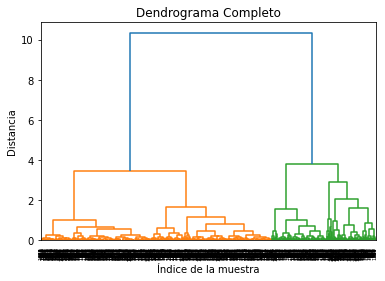

In [18]:
#method:single,complete,avergae,centroid, ward,mean
#metric: minkowski, cityblock,euclidean,cosine,correlación,
#jaccard,chebyshev,hamming,mahalanobis,etc...
#note:centroid, median y ward sólo con Euclidean

#Dendograma
plt.title('Dendrograma Completo')
plt.xlabel('Índice de la muestra')
plt.ylabel('Distancia')
dn = hierarchy.dendrogram(HC)
plt.show()
# si se corta en 3, se obtienen 3 grupos
# si se cora en 4, se obtienen 4 grupos

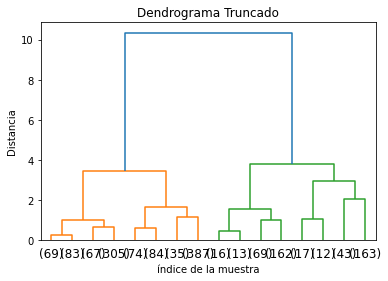

In [19]:
#plt.figure(figsize=(25,15))
plt.figure()
plt.title('Dendrograma Truncado')
plt.xlabel('índice de la muestra')
plt.ylabel('Distancia')
dn = hierarchy.dendrogram(HC, truncate_mode='level',p=3)
plt.show()
# 2 o 5 clusters

### 1.1.4 Clustering

In [20]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
grupos=cluster.fit_predict(X_norm)
grupos

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [21]:
# alcohol, chlorides

In [22]:
colores=['red','orange','blue', 'purple', 'green', 'yellow']
asignar = [colores[row] for row in grupos]
px.scatter_3d(data, x='pH', y='free sulfur dioxide', z='residual sugar', color=asignar)

#### 1.1.4.1 Cluster 1

In [23]:
# %%Extraer los elementos de cada clúster
# se relaciona con el vector antes obtenidos
# #Cluster 1
idx_0 = grupos==0
subdata_0 = pd.DataFrame(X[idx_0], columns=['pH', 'free sulfur dioxide', 'residual sugar'])
subdata_0

,pH,free sulfur dioxide,residual sugar
18,3.38,6.0,4.4
26,3.28,4.0,1.8
29,3.38,8.0,2.0
35,3.40,5.0,5.5
36,3.42,3.0,2.4
...,...,...,...
1518,3.32,7.0,2.2
1530,3.42,9.0,2.2
1540,3.56,11.0,4.4
1574,3.39,23.0,13.9


In [24]:
# como se podria esperar, se obtendran distribuciones bien definidas en sulfuro libre.

In [25]:
res_ = res[["pH", "free sulfur dioxide", "residual sugar"]]

In [26]:
# resumen estadístico del primer clúster
#"op","ex","ag"
res_0=subdata_0.describe()
res_0_ = res_0.join(res_, lsuffix='_cluster_0', rsuffix='_original')
res_0_.columns = [
    ["Cluster_1", "Cluster_1", "Cluster_1", "Original", "Original", "Original"],
    ["pH", "free sulfur dioxide", "residual sugar"]*2
]
res_0_.style.format("{:.2f}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [27]:
# porcentaje de individuos en el cluster 1 para cada calificación
print(
    (pd.value_counts(data['quality'][idx_0])/pd.value_counts(data['quality'])*100)
    .reset_index().rename(columns={'index':'quality', 'quality':'% Cluster 1'})
)

   quality  % Cluster 1
0        3    60.000000
1        4    47.169811
2        5    25.697504
3        6    31.347962
4        7    39.698492
5        8    55.555556


#### 1.1.4.2 Cluster 2

In [28]:
#Cluster 2
idx_1 = grupos==1
subdata_1 =pd.DataFrame(X[idx_1], columns=['pH', 'free sulfur dioxide', 'residual sugar'])
res_1=subdata_1.describe()
res_1_ = res_1.join(res_, lsuffix='_cluster_1', rsuffix='_original')
res_1_.columns = [["Cluster_2", "Cluster_2", "Cluster_2", "Original", "Original", "Original"], ["pH", "free sulfur dioxide", "residual sugar"]*2]
res_1_.style.format("{:.2f}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [29]:
print(
    (pd.value_counts(data['quality'][idx_1])/pd.value_counts(data['quality'])*100)
    .reset_index().rename(columns={'index':'quality', 'quality':'% Cluster 2'})
)

   quality  % Cluster 2
0        5    74.302496
1        6    68.652038
2        7    60.301508
3        4    52.830189
4        8    44.444444
5        3    40.000000
